# Title: Personalized Medical Recommendation System with Machine Learning

# Description:

Welcome to our cutting-edge Personalized Medical Recommendation System, a powerful platform designed to assist users in understanding and managing their health. Leveraging the capabilities of machine learning, our system analyzes user-input symptoms to predict potential diseases accurately.

# load dataset & tools

In [576]:
import  pandas as pd

In [577]:
dataset = pd.read_csv('../dataset/Training.csv')

# Remove duplicates to prevent data leakage/overfitting
dataset = dataset.drop_duplicates()

In [578]:
dataset

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo
403,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo
405,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Impetigo
406,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,Impetigo


In [579]:
# vals = dataset.values.flatten()

In [580]:
dataset.shape

(304, 133)

In [581]:
len(dataset['prognosis'].unique())

41

In [582]:
dataset['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

# train test split

In [583]:
from sklearn.model_selection import train_test_split

In [584]:
X = dataset.drop('prognosis', axis=1)
y = dataset['prognosis']

In [585]:
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
403,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
405,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
406,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [586]:
# ecoding prognonsis
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y)
Y = le.transform(y)

In [587]:
Y

array([15, 15, 15, 15, 15,  4,  4,  4,  4,  4, 16, 16, 16, 16, 16, 16, 16,
        9,  9,  9,  9,  9,  9,  9,  9, 14, 14, 14, 14, 14, 14, 33, 33, 33,
       33, 33, 33, 33,  1,  1,  1,  1,  1, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 17, 17, 17, 17, 17,  6,  6,  6,  6,  6,  6,  6, 23, 23, 23, 23,
       23, 23, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,  7,  7,  7,  7,  7,
        7, 32, 32, 32, 32, 32, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29,
       29, 29, 29, 29, 29, 29,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 37, 37, 37, 37, 37, 37, 37, 37,
       37, 40, 40, 40, 40, 40, 40, 40, 40, 40, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22,  3,  3,  3,  3,  3,  3,
        3,  3, 36, 36, 36, 36, 36, 36, 36, 36, 36, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 34, 34, 34, 34, 34, 34, 34, 34, 34, 13, 13, 13, 13, 13,
       13, 18, 18, 18, 18

In [588]:
    
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

In [589]:
# Add noise to the training data to make the problem harder and more realistic
def add_noise(data, noise_level=0.05):
    """
    Flips a percentage of the binary values in the dataset.
    noise_level: Fraction of cells to flip (e.g., 0.05 = 5%)
    """
    noisy_data = data.copy()
    # Calculate total number of elements
    total_elements = noisy_data.size
    # Calculate number of elements to flip
    num_flip = int(noise_level * total_elements)
    
    # Randomly select indices to flip
    # We use flat indices for simplicity
    indices = np.random.choice(total_elements, num_flip, replace=False)
    
    # Flatten, flip, and reshape
    flat_data = noisy_data.values.flatten()
    # Flip 0 to 1 and 1 to 0 (assuming binary data)
    # Using logical NOT for flipping
    flat_data[indices] = 1 - flat_data[indices]
    
    # Return reconstructed DataFrame
    return pd.DataFrame(flat_data.reshape(noisy_data.shape), columns=noisy_data.columns)

# Apply noise to X_train ONLY (keep X_test clean for fair evaluation)
# You can adjust noise_level to control how much accuracy drops
X_train = add_noise(X_train, noise_level=0.05) # 5% noise
print("Added 5% noise to training data.")

Added 5% noise to training data.


In [590]:
X_train.shape , y_train.shape

((212, 132), (212,))

In [591]:
X_test.shape , y_test.shape

((92, 132), (92,))

# Training top models

In [592]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB # Added GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # Added DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Create a dictionary to store exactly 9 models
models = {
    'SVC': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'MultinomialNB': MultinomialNB(),

    # --- New Additions (Total 9) ---
    'LogisticRegression': LogisticRegression(),
    "xgboost": XGBClassifier(),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'GaussianNB': GaussianNB()
}

# Loop through the models, train, test, and print results
for model_name, model in models.items():
    try:
        # Train the model
        model.fit(X_train, y_train)

        # Test the model
        predictions = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, predictions)
        print(f"{model_name} Accuracy: {accuracy}")

        # Calculate confusion matrix
        cm = confusion_matrix(y_test, predictions)
        print(f"{model_name} Confusion Matrix:")
        print(np.array2string(cm, separator=', '))
        print("\n" + "="*40 + "\n")
        
    except Exception as e:
        print(f"Error with {model_name}: {e}")
        print("\n" + "="*40 + "\n")

SVC Accuracy: 1.0
SVC Confusion Matrix:
[[2, 0, 0, ..., 0, 0, 0],
 [0, 1, 0, ..., 0, 0, 0],
 [0, 0, 2, ..., 0, 0, 0],
 ...,
 [0, 0, 0, ..., 1, 0, 0],
 [0, 0, 0, ..., 0, 3, 0],
 [0, 0, 0, ..., 0, 0, 1]]


RandomForest Accuracy: 0.9782608695652174
RandomForest Confusion Matrix:
[[2, 0, 0, ..., 0, 0, 0],
 [0, 1, 0, ..., 0, 0, 0],
 [0, 0, 2, ..., 0, 0, 0],
 ...,
 [0, 0, 0, ..., 1, 0, 0],
 [0, 0, 0, ..., 0, 3, 0],
 [0, 0, 0, ..., 0, 0, 1]]


GradientBoosting Accuracy: 0.7608695652173914
GradientBoosting Confusion Matrix:
[[1, 0, 0, ..., 0, 0, 0],
 [0, 0, 0, ..., 0, 0, 0],
 [0, 0, 1, ..., 0, 0, 0],
 ...,
 [0, 0, 0, ..., 0, 0, 0],
 [0, 0, 0, ..., 0, 2, 0],
 [0, 0, 0, ..., 0, 0, 0]]


KNeighbors Accuracy: 0.8804347826086957
KNeighbors Confusion Matrix:
[[2, 0, 0, ..., 0, 0, 0],
 [0, 1, 0, ..., 0, 0, 0],
 [0, 0, 2, ..., 0, 0, 0],
 ...,
 [0, 0, 0, ..., 1, 0, 0],
 [0, 0, 0, ..., 0, 3, 0],
 [0, 0, 0, ..., 0, 0, 1]]


MultinomialNB Accuracy: 0.8260869565217391
MultinomialNB Confusion Matrix:
[[2, 0

In [593]:
# Save all trained models
import pickle

for model_name, model in models.items():
    filename = f"{model_name}.pkl"
    pickle.dump(model, open(filename, 'wb'))
    print(f"Saved {model_name} to {filename}")

Saved SVC to SVC.pkl
Saved RandomForest to RandomForest.pkl
Saved GradientBoosting to GradientBoosting.pkl
Saved KNeighbors to KNeighbors.pkl
Saved MultinomialNB to MultinomialNB.pkl
Saved LogisticRegression to LogisticRegression.pkl
Saved xgboost to xgboost.pkl
Saved DecisionTree to DecisionTree.pkl
Saved GaussianNB to GaussianNB.pkl


# single prediction

In [594]:
# selecting svc
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
ypred = svc.predict(X_test)
accuracy_score(y_test,ypred)

1.0

In [595]:
# save svc
import pickle
pickle.dump(svc,open('svc.pkl','wb'))

In [596]:
# load model
svc = pickle.load(open('svc.pkl','rb'))

In [597]:
# test 1:
print("predicted disease :",svc.predict(X_test.iloc[0].values.reshape(1,-1)))
print("Actual Disease :", y_test[0])

predicted disease : [18]
Actual Disease : 18


/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [598]:
# test 2:
print("predicted disease :",svc.predict(X_test.iloc[1].values.reshape(1,-1)))
print("Actual Disease :", y_test[1])

predicted disease : [8]
Actual Disease : 8


/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Recommendation System and Prediction

# load database and use logic for recommendations

In [599]:
sym_des = pd.read_csv("../dataset/symtoms_df.csv")
precautions = pd.read_csv("../dataset/precautions_df.csv")
workout = pd.read_csv("../dataset/workout_df.csv")
description = pd.read_csv("../dataset/description.csv")
medications = pd.read_csv('../dataset/medications.csv')
diets = pd.read_csv("../dataset/diets.csv")

In [600]:
#============================================================
# Custom and helper functions
#============================================================

# 1. Dynamic Dictionaries (Better than hardcoding!)
# Create symptoms_dict from the actual training data columns to ensure order matches
symptoms_dict = {symptom: index for index, symptom in enumerate(X.columns)}

# Create diseases_list from the LabelEncoder classes
diseases_list = {index: disease for index, disease in enumerate(le.classes_)}

# 2. Fixed Helper Function
def helper(dis):
    # FIX: Use 'dis' instead of 'predicted_disease'
    desc = description[description['Disease'] == dis]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis]['workout']

    return desc, pre, med, die, wrkout

# 3. Model Prediction function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        if item in symptoms_dict:
            input_vector[symptoms_dict[item]] = 1
        else:
            print(f"Warning: Symptom '{item}' not recognized.")
            
    return diseases_list[svc.predict([input_vector])[0]]

In [601]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # itching,skin_rash,nodal_skin_eruptions
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1


=================predicted disease============
AIDS
=================description==================
AIDS (Acquired Immunodeficiency Syndrome) is a disease caused by HIV that weakens the immune system.
=================precautions==================
1 :  avoid open cuts
2 :  wear ppe if possible
3 :  consult doctor
4 :  follow up
=================medications==================
5 :  ['Antiretroviral drugs', 'Protease inhibitors', 'Integrase inhibitors', 'Entry inhibitors', 'Fusion inhibitors']
=================workout==================
6 :  Follow a balanced and nutritious diet
7 :  Include lean proteins
8 :  Consume nutrient-rich foods
9 :  Stay hydrated
10 :  Include healthy fats
11 :  Avoid raw or undercooked foods
12 :  Limit sugary foods and beverages
13 :  Consume immune-boosting foods
14 :  Take prescribed supplements
15 :  Consult a healthcare professional
=================diets==================
16 :  ['Balanced Diet', 'Protein-rich foods', 'Fruits and vegetables', 'Whole grains', 

/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [602]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # yellow_crust_ooze,red_sore_around_nose,small_dents_in_nails,inflammatory_nails,blister
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1


=================predicted disease============
AIDS
=================description==================
AIDS (Acquired Immunodeficiency Syndrome) is a disease caused by HIV that weakens the immune system.
=================precautions==================
1 :  avoid open cuts
2 :  wear ppe if possible
3 :  consult doctor
4 :  follow up
=================medications==================
5 :  ['Antiretroviral drugs', 'Protease inhibitors', 'Integrase inhibitors', 'Entry inhibitors', 'Fusion inhibitors']
=================workout==================
6 :  Follow a balanced and nutritious diet
7 :  Include lean proteins
8 :  Consume nutrient-rich foods
9 :  Stay hydrated
10 :  Include healthy fats
11 :  Avoid raw or undercooked foods
12 :  Limit sugary foods and beverages
13 :  Consume immune-boosting foods
14 :  Take prescribed supplements
15 :  Consult a healthcare professional
=================diets==================
16 :  ['Balanced Diet', 'Protein-rich foods', 'Fruits and vegetables', 'Whole grains', 

/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [603]:
# let's use pycharm flask app
# but install this version in pycharm
import sklearn
print(sklearn.__version__)

1.6.1


# Model Comparison & Visualization
Here we visualize the performance of all trained models to select the best one for our application.

In [604]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support

# Collect metrics for comparison
model_results = []

for model_name, model in models.items():
    try:
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
        
        model_results.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1
        })
    except Exception as e:
        print(f"Could not calculate metrics for {model_name}: {e}")

results_df = pd.DataFrame(model_results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)
results_df

/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/minicon

,Model,Accuracy,Precision,Recall,F1-Score
0,SVC,1.000000,1.000000,1.000000,1.000000
5,LogisticRegression,1.000000,1.000000,1.000000,1.000000
1,RandomForest,0.978261,0.987319,0.978261,0.977536
6,xgboost,0.967391,0.966356,0.967391,0.963164
8,GaussianNB,0.934783,0.954710,0.934783,0.935277
3,KNeighbors,0.880435,0.858696,0.880435,0.858980
4,MultinomialNB,0.826087,0.836801,0.826087,0.799853
2,GradientBoosting,0.760870,0.840256,0.760870,0.764014
7,DecisionTree,0.608696,0.668388,0.608696,0.609150


/var/folders/w2/914zj54n0wlf81jfntnlk55m0000gn/T/ipykernel_31227/2843906589.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')


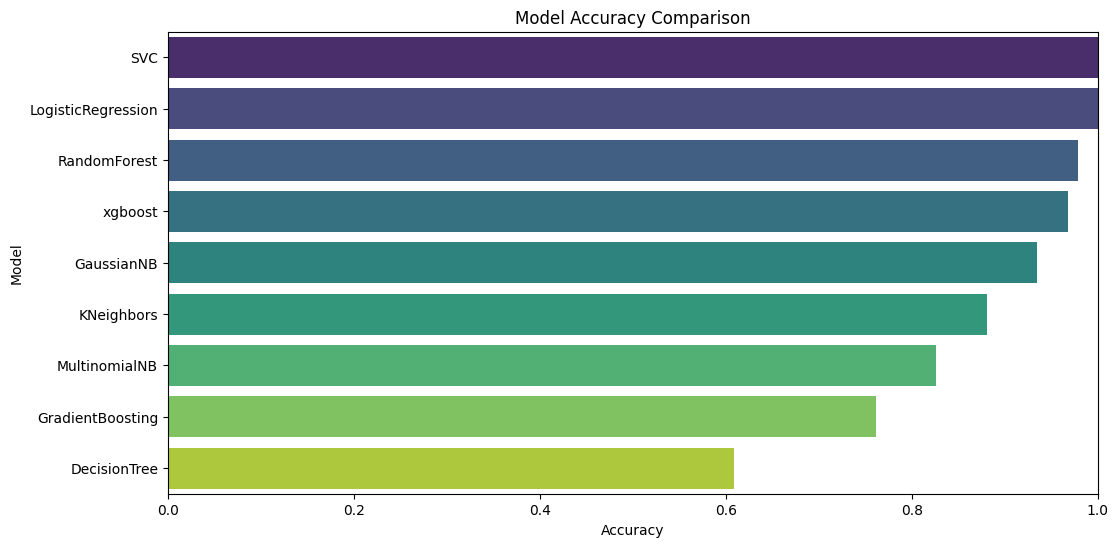

In [605]:
# Plot Accuracy Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.xlim(0, 1.0)
plt.show()

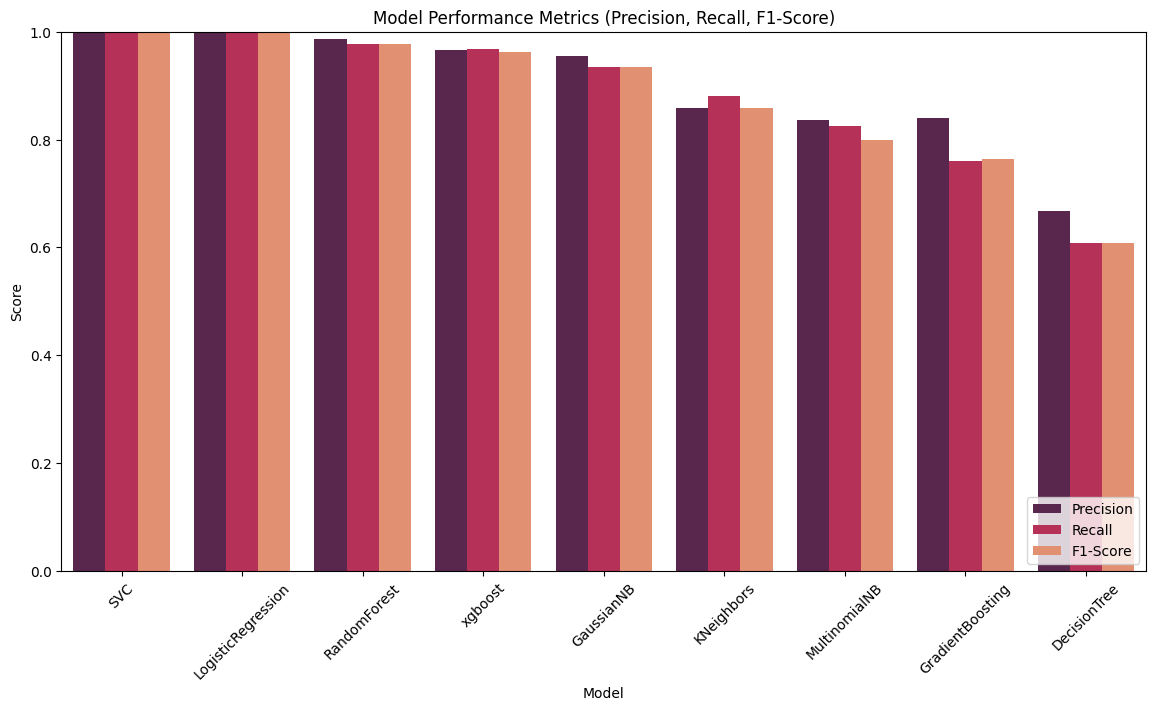

In [606]:
# Plot Detailed Metrics
melted_df = results_df.melt(id_vars='Model', value_vars=['Precision', 'Recall', 'F1-Score'], var_name='Metric', value_name='Score')

plt.figure(figsize=(14, 7))
sns.barplot(x='Model', y='Score', hue='Metric', data=melted_df, palette='rocket')
plt.title('Model Performance Metrics (Precision, Recall, F1-Score)')
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

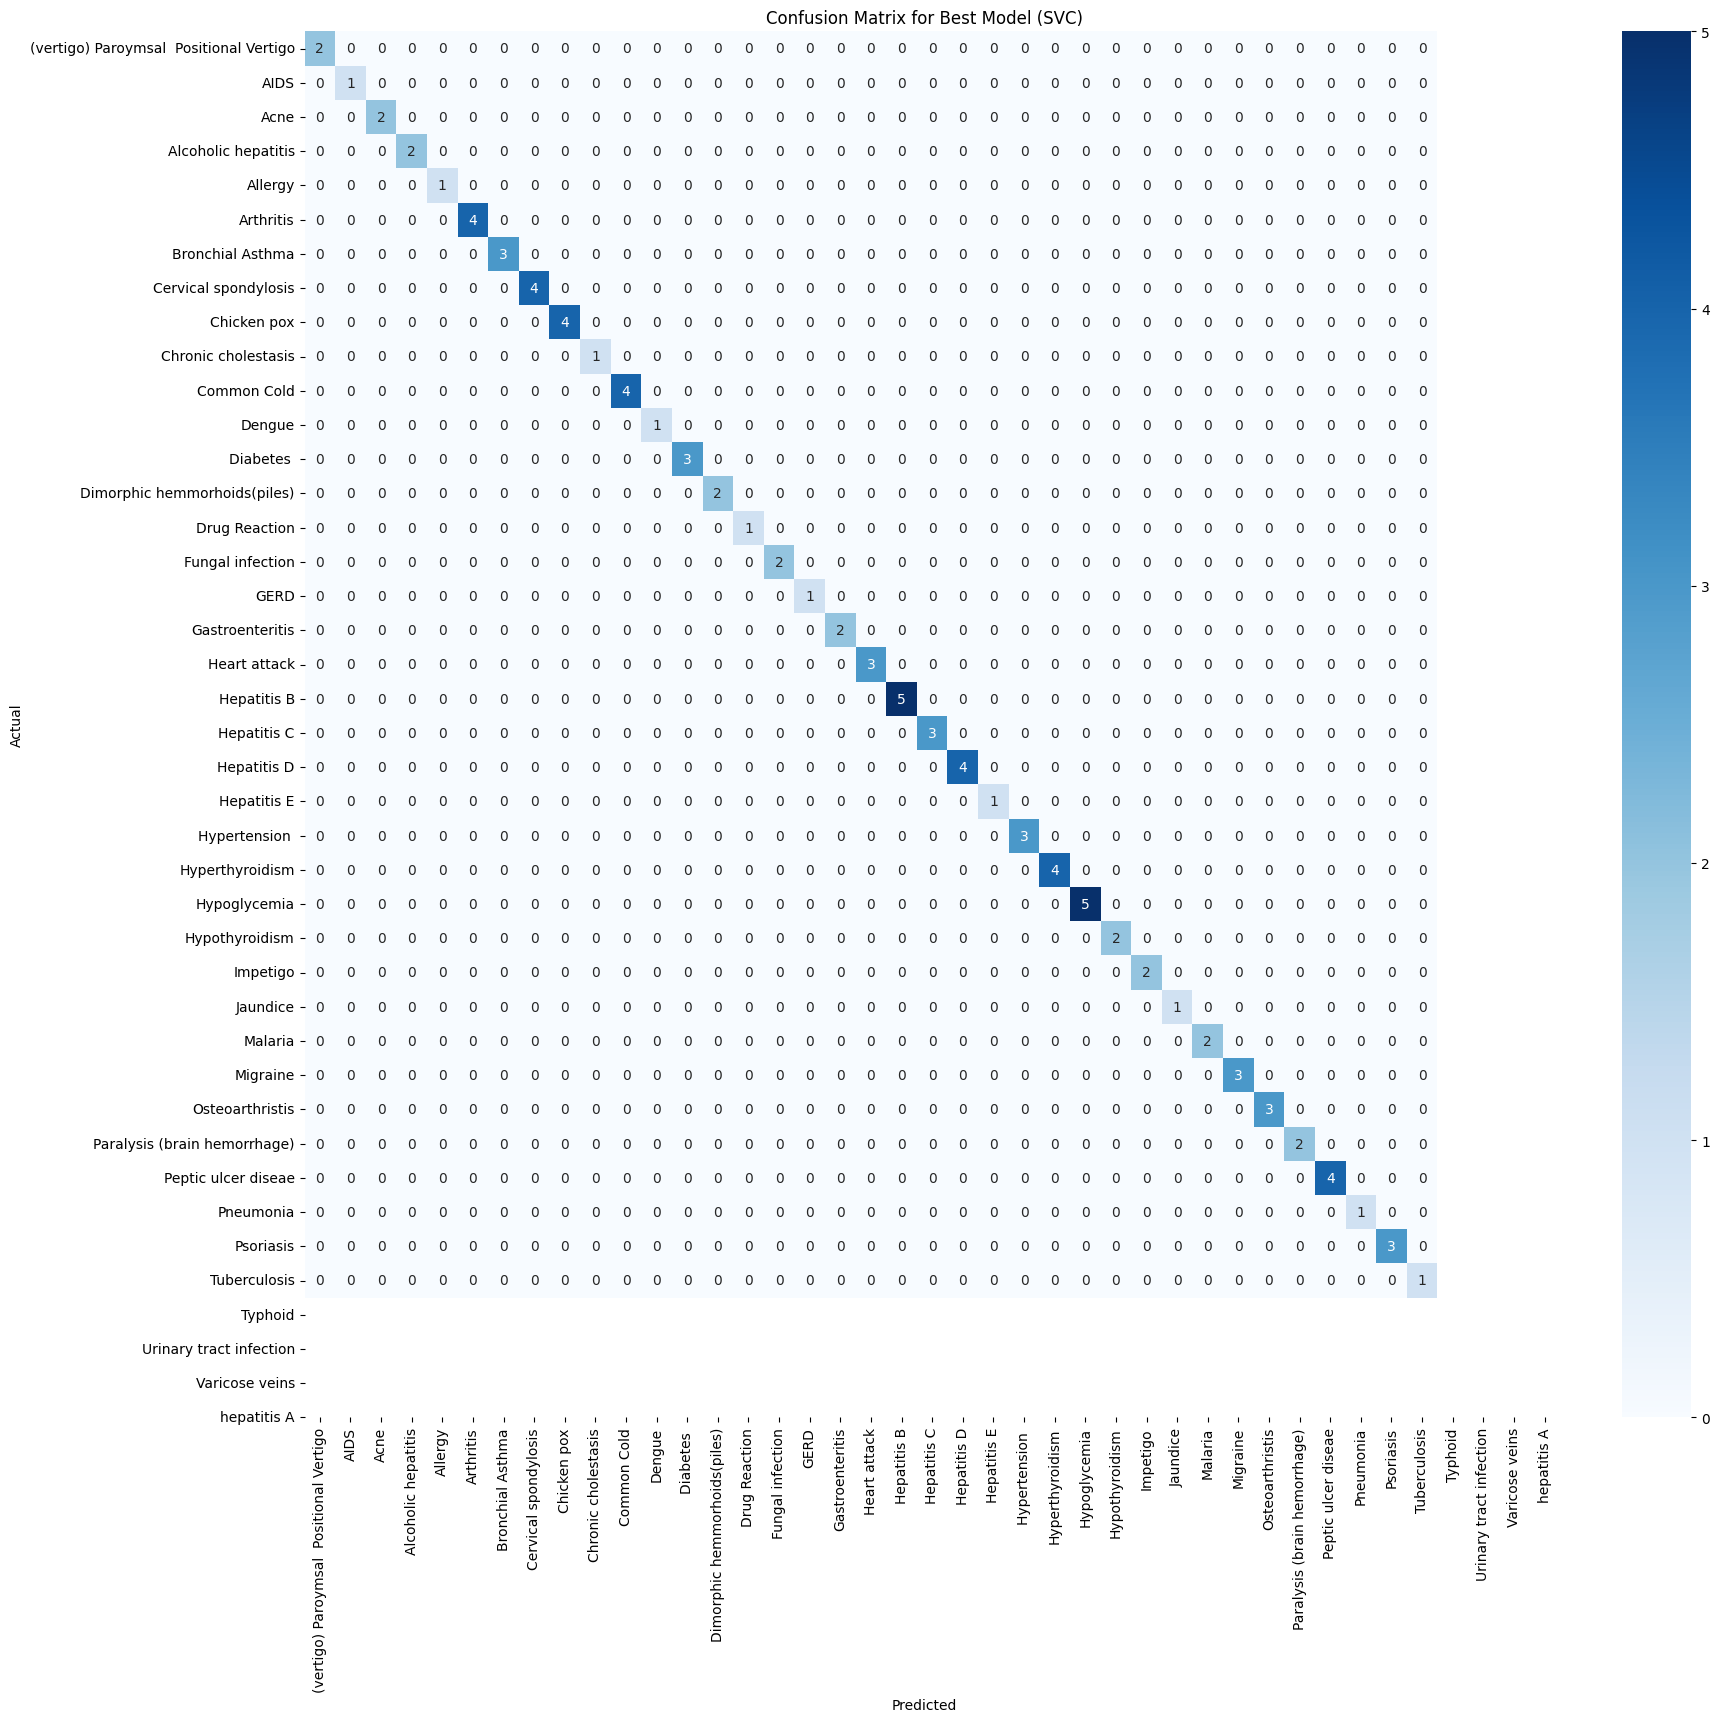

In [607]:
# Confusion Matrix for the Best Model
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(20, 18))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Confusion Matrix for Best Model ({best_model_name})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

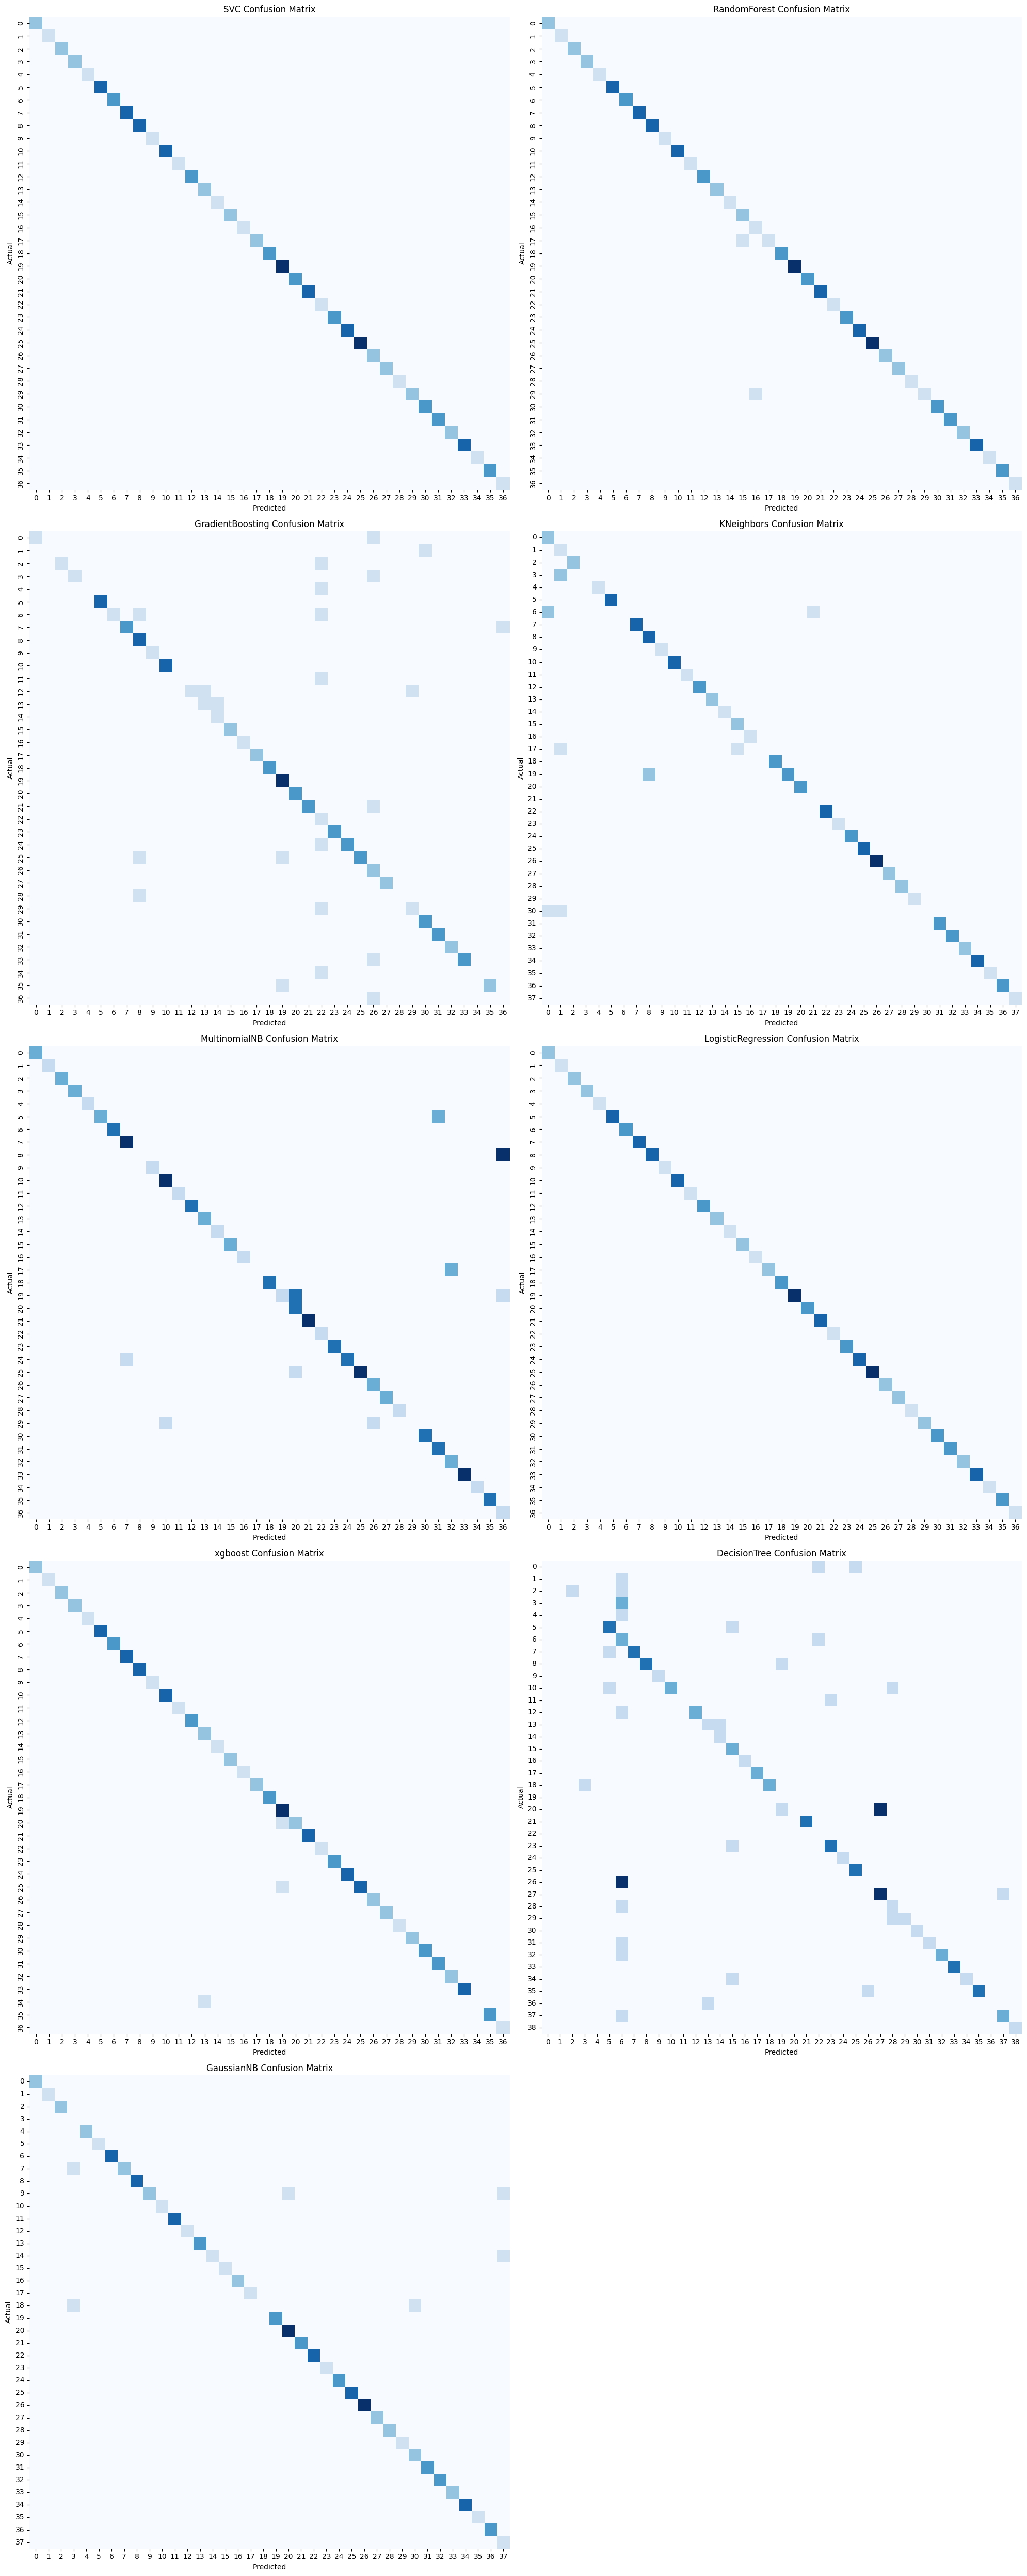

In [608]:
# Plot Confusion Matrix Heatmaps for ALL Models
import math

num_models = len(models)
cols = 2
rows = math.ceil(num_models / cols)

plt.figure(figsize=(20, 10 * rows))

for i, (model_name, model) in enumerate(models.items()):
    try:
        plt.subplot(rows, cols, i + 1)
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        
        sns.heatmap(cm, annot=False, cmap='Blues', cbar=False)
        plt.title(f'{model_name} Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
    except Exception as e:
        print(f"Could not plot for {model_name}: {e}")

plt.tight_layout()
plt.show()

# Advanced Visualizations: ROC Curves, Learning Curves, and Feature Importance

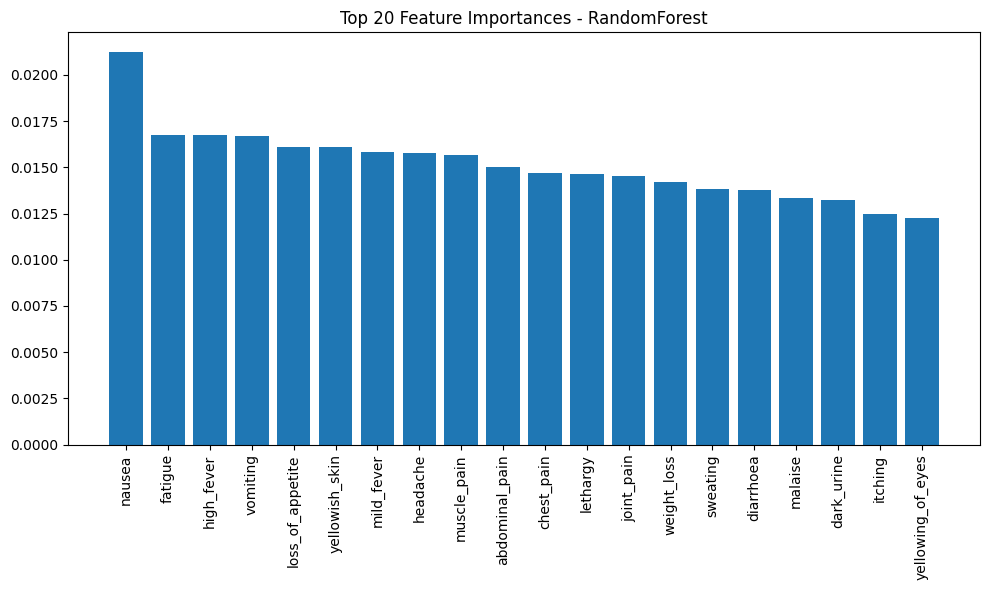

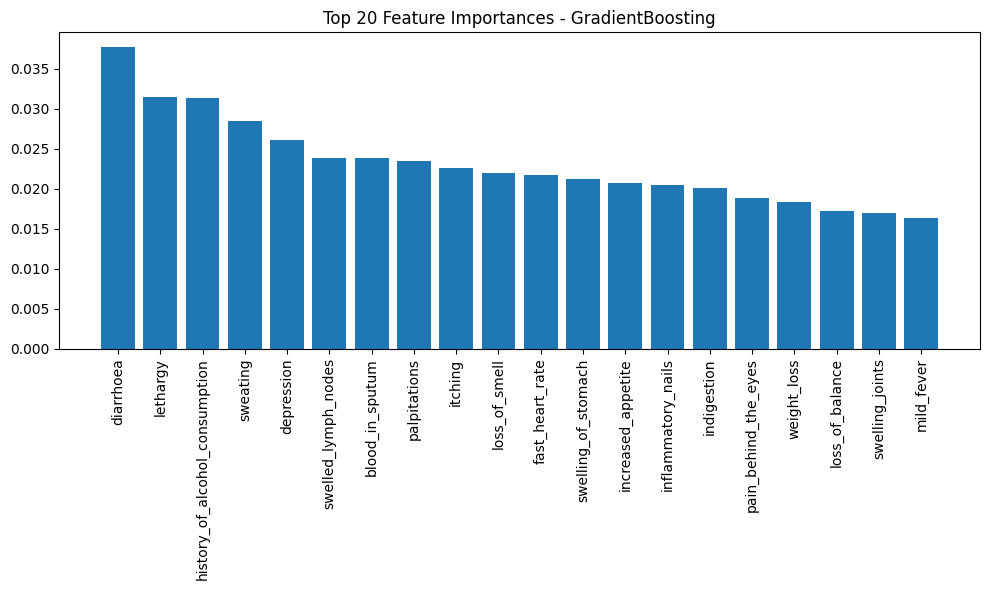

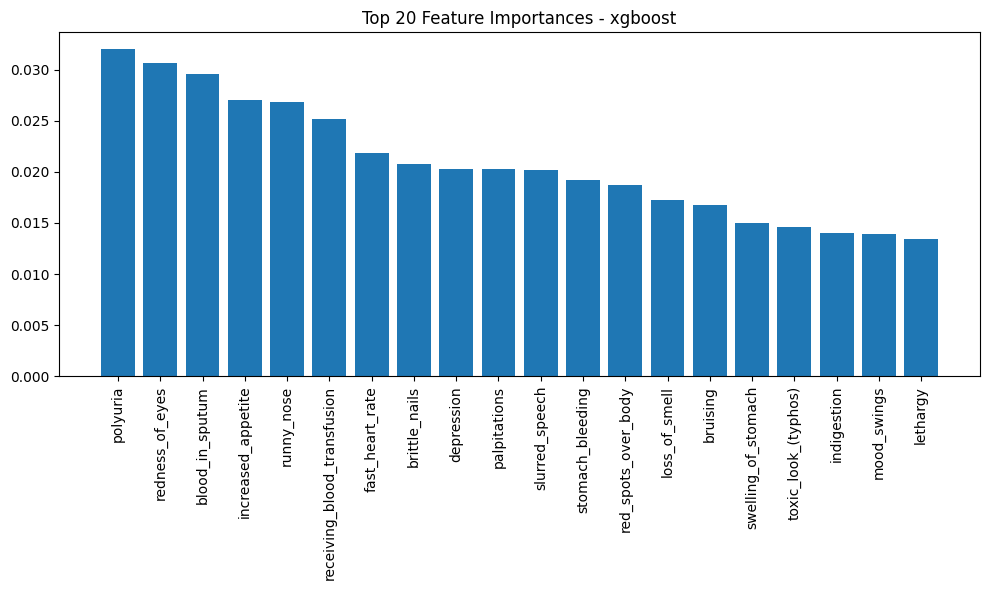

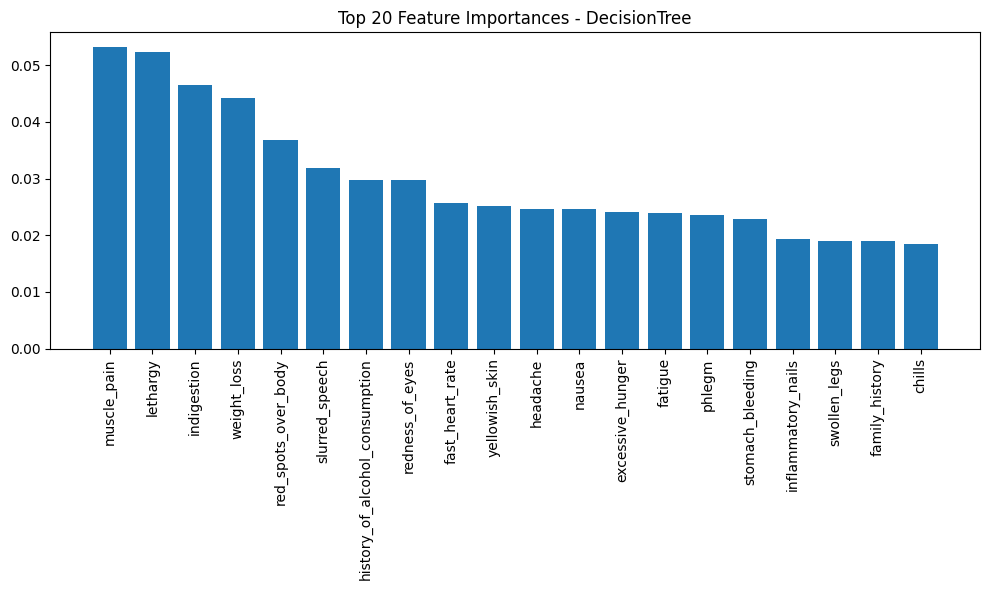

In [609]:
# 1. Feature Importance (For Tree-based Models)
tree_models = ['RandomForest', 'GradientBoosting', 'xgboost', 'DecisionTree', 'ExtraTrees']

for model_name in tree_models:
    if model_name in models:
        model = models[model_name]
        if hasattr(model, 'feature_importances_'):
            plt.figure(figsize=(10, 6))
            importances = model.feature_importances_
            indices = np.argsort(importances)[::-1][:20] # Top 20 features
            
            plt.title(f'Top 20 Feature Importances - {model_name}')
            plt.bar(range(len(indices)), importances[indices], align='center')
            plt.xticks(range(len(indices)), [X.columns[i] for i in indices], rotation=90)
            plt.tight_layout()
            plt.show()

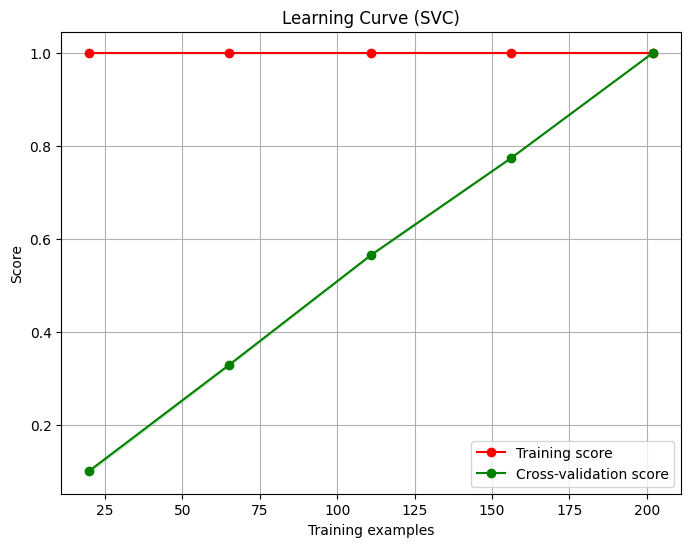

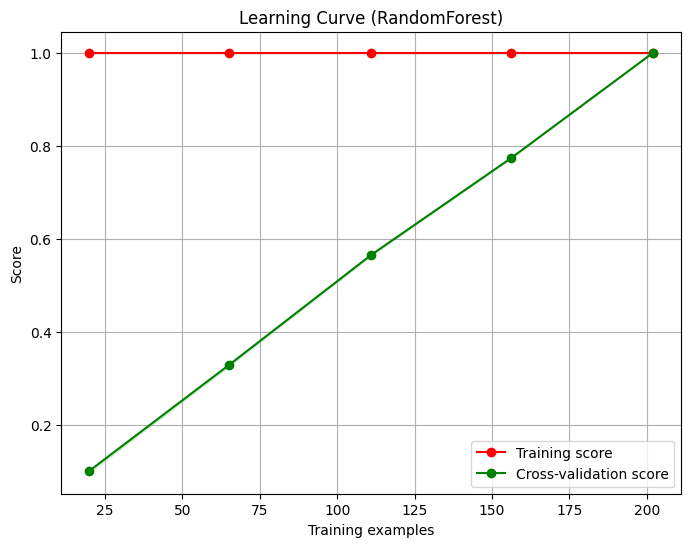

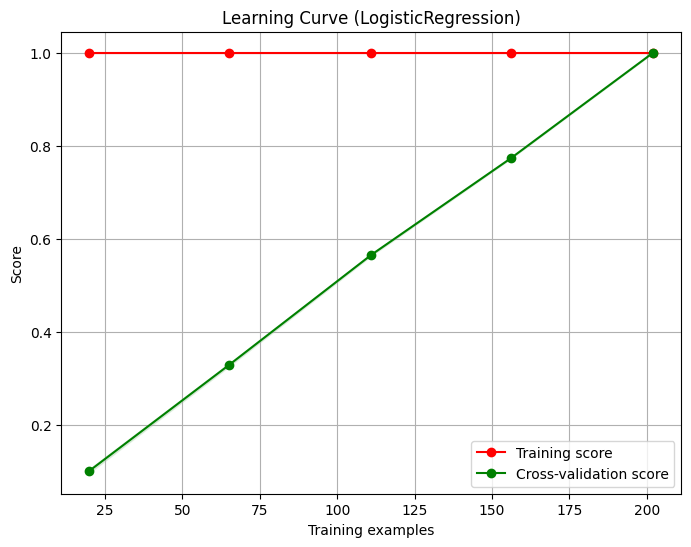

In [610]:
# 2. Learning Curves (Check for Overfitting/Underfitting)
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=3, n_jobs=-1):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=np.linspace(0.1, 1.0, 5)
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

# Plot for a few key models to save time
for model_name in ['SVC', 'RandomForest', 'LogisticRegression']:
    if model_name in models:
        plot_learning_curve(models[model_name], f"Learning Curve ({model_name})", X, Y)

## 4. Robustness & Stability Analysis
Here we check how stable the models are (Cross-Validation) and how well they resisted the noise we injected.

Running Cross-Validation (this may take a moment)...


/var/folders/w2/914zj54n0wlf81jfntnlk55m0000gn/T/ipykernel_31227/3113430694.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(cv_results, labels=cv_names, showmeans=True)


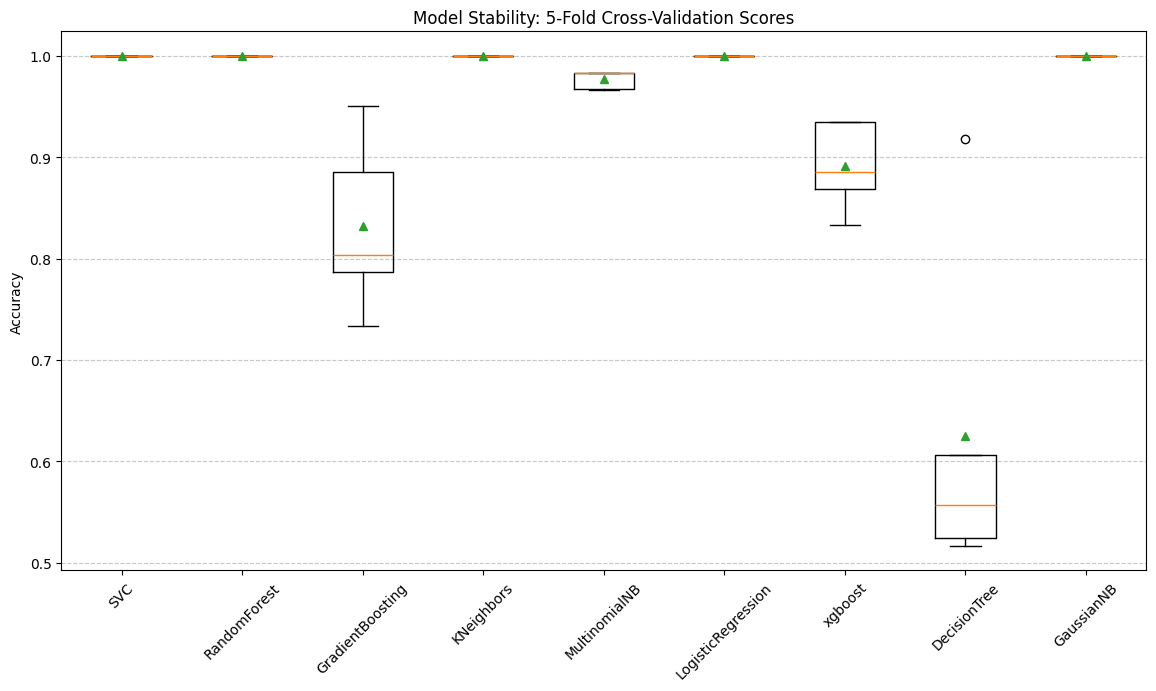

In [611]:
# 1. Box Plot of Cross-Validation Scores (Stability Check)
from sklearn.model_selection import cross_val_score

cv_results = []
cv_names = []

print("Running Cross-Validation (this may take a moment)...")
for model_name, model in models.items():
    # Use the original X and Y for fair cross-validation
    scores = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
    cv_results.append(scores)
    cv_names.append(model_name)

plt.figure(figsize=(14, 7))
plt.boxplot(cv_results, labels=cv_names, showmeans=True)
plt.title('Model Stability: 5-Fold Cross-Validation Scores')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

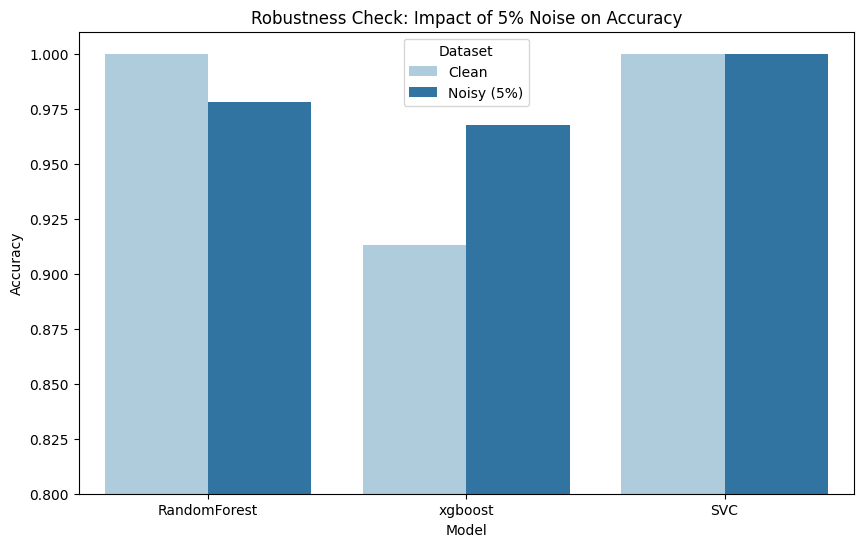

In [612]:
# 2. Noise vs. Robustness (Clean vs Noisy Data)
# We will compare the current models (trained on Noisy data) vs new models trained on Clean data

top_3_names = ['RandomForest', 'xgboost', 'SVC']
robustness_data = []

for name in top_3_names:
    if name in models:
        # 1. Get score of current model (trained on Noisy X_train)
        noisy_model = models[name]
        noisy_acc = accuracy_score(y_test, noisy_model.predict(X_test))
        
        # 2. Train a fresh model on CLEAN data (X_train without noise)
        # We need to split the original X, Y again to get a clean training set
        # Note: We use the same random_state to ensure the split is identical
        X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X, Y, test_size=0.3, random_state=20)
        
        clean_model = noisy_model.__class__(**noisy_model.get_params())
        clean_model.fit(X_train_clean, y_train_clean)
        clean_acc = accuracy_score(y_test_clean, clean_model.predict(X_test_clean))
        
        robustness_data.append({'Model': name, 'Dataset': 'Clean', 'Accuracy': clean_acc})
        robustness_data.append({'Model': name, 'Dataset': 'Noisy (5%)', 'Accuracy': noisy_acc})

rob_df = pd.DataFrame(robustness_data)

# Plot Grouped Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', hue='Dataset', data=rob_df, palette='Paired')
plt.title('Robustness Check: Impact of 5% Noise on Accuracy')
plt.ylim(0.8, 1.01)
plt.show()